# Google Data Analytics Captone
## How does a bike-share navigate speedy success?
### Made by Marco Ardizzone
### November 2021
### Altri Dati vari

### Ask phase:
In this phase we are trying to figure out what are the stakeholder's requests and how we and our analysis can help them.
They want us to analyze their annual data, in order to suggest them a data-driven strategy for converting casual riders to annual member. 

### Prepare phase:

The data sources used is:
* Divvy_Trips_2019_Q1.csv: contains data about Q1 of 2019's historical trip data
* Divvy_Trips_2019_Q2.csv: contains data about Q2 of 2019's historical trip data
* Divvy_Trips_2019_Q3.csv: contains data about Q3 of 2019's historical trip data
* Divvy_Trips_2019_Q4.csv: contains data about Q4 of 2019's historical trip data

Each file contains the following fields:
* trip_id
* start_time
* end_time
* bikeid
* tripduration
* from_station_id
* from_station_name
* to_station_id
* to_station_name
* usertype
* gender
* birthyear        

We assume the data is credibile and does not contain bias, since it comes from the company itself.
Data integrity will be checked in the next phase.

### Process phase
We choose to process data using R.
This decision comes from the data shape: there are 12 columns and 3.818.004 rows, spreadsheets could not manage this much data.
It could be possible to use SQL, but we prefer R because allows to clean, sort, filter and visualize data in one place.

Firstly, we load data into R and check them.

In [1]:
df_Q1 <- read.csv("Divvy_Trips_2019_Q1.csv")
df_Q2 <- read.csv("Divvy_Trips_2019_Q2.csv")
df_Q3 <- read.csv("Divvy_Trips_2019_Q3.csv")
df_Q4 <- read.csv("Divvy_Trips_2019_Q4.csv")

We now check column names and first rows

In [2]:
head(df_Q1)
colnames(df_Q1)


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [3]:
head(df_Q2)
colnames(df_Q2)


X01...Rental.Details.Rental.ID,X01...Rental.Details.Local.Start.Time,X01...Rental.Details.Local.End.Time,X01...Rental.Details.Bike.ID,X01...Rental.Details.Duration.In.Seconds.Uncapped,X03...Rental.Start.Station.ID,X03...Rental.Start.Station.Name,X02...Rental.End.Station.ID,X02...Rental.End.Station.Name,User.Type,Member.Gender,X05...Member.Details.Member.Birthday.Year
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257.0,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999


[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

In [4]:
head(df_Q3)
colnames(df_Q3)


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [5]:
head(df_Q4)
colnames(df_Q4)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373.0,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994


[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

We notice that data from Q2 have different column names, so the change them in order for them to be consistent.

In [6]:
colnames(df_Q2) <- colnames(df_Q1)
colnames(df_Q2)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

Now that every df has the same column names, we can merge them.

In [7]:
merged <- rbind(df_Q1, df_Q2, df_Q3, df_Q4)
head(merged)
str(merged)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


'data.frame':	3818004 obs. of  12 variables:
 $ trip_id          : int  21742443 21742444 21742445 21742446 21742447 21742448 21742449 21742450 21742451 21742452 ...
 $ start_time       : Factor w/ 3306090 levels "2019-01-01 00:04:37",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ end_time         : Factor w/ 3238342 levels "2019-01-01 00:11:07",..: 1 2 9 17 6 4 3 5 20 7 ...
 $ bikeid           : int  2167 4386 1524 252 1170 2437 2708 2796 6205 3939 ...
 $ tripduration     : Factor w/ 21542 levels "1,000.0","1,001.0",..: 3769 4494 6263 789 3734 2576 1495 1115 732 3686 ...
 $ from_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: Factor w/ 640 levels "2112 W Peterson Ave",..: 540 510 429 71 375 328 328 497 228 309 ...
 $ to_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : Factor w/ 641 levels "2112 W Peterson Ave",..: 383 189 573 120 527 188 188 365 506 127 ...
 $ usertype         : Factor w/ 2 levels "Customer","Subscriber": 2 2 2 2 2 2

We notice that *gender* has 3 levels, "", "Female" and "Male", but empty string is not a good value so we choose to change it to "Not Given"

In [8]:
levels(merged$gender) <- c(levels(merged$gender), "Not Given")
str(merged$gender)

 Factor w/ 4 levels "","Female","Male",..: 3 2 2 3 3 2 3 3 3 3 ...


In [9]:
merged$gender[merged$gender==""] <- "Not Given"
str(merged$gender)
length(merged$gender[merged$gender==""])

 Factor w/ 4 levels "","Female","Male",..: 3 2 2 3 3 2 3 3 3 3 ...


[1] 0

We now check for NA values 

In [10]:
for(i in 1:ncol(merged)){
  cat(sprintf("%s : %d\n", colnames(merged)[i], sum(is.na(merged[,i]))))
}

trip_id : 0
start_time : 0
end_time : 0
bikeid : 0
tripduration : 0
from_station_id : 0
from_station_name : 0
to_station_id : 0
to_station_name : 0
usertype : 0
gender : 0
birthyear : 538751


Only some *birthyear* is NA, which is not a problem at all.

Now we want to add the day of the ride

In [11]:
merged$day_of_week <- format(as.Date(merged$start_time,format="%Y-%m-%d"), format = "%A")


In [12]:
merged$day <- format(as.Date(merged$start_time,format="%Y-%m-%d"), format = "%u")


In [13]:
merged$month <- format(as.Date(merged$start_time,format="%Y-%m-%d"), format = "%m")


In [14]:
merged$year <- format(as.Date(merged$start_time,format="%Y-%m-%d"), format = "%Y")


Now we notice thare *tripduration* is stored as character, we decide to convert it to double

In [15]:
#install.packages("stringr")
library(stringr)
merged$tripduration <- str_replace_all(merged$tripduration, ",", "")
merged$tripduration <- as.double(merged$tripduration)

Warning message:
"package 'stringr' was built under R version 3.6.3"

### Analyze phase

In [16]:
summary(merged$tripduration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      61      411      709     1450     1283 10628400 

We can notice that 50% of the rides ore no longher then 12 minutes.

Let's now compare subscriber and casual members mean.

In [17]:
aggregate(merged$tripduration ~ merged$usertype, FUN = mean)



merged$usertype,merged$tripduration
Customer,3420.8857
Subscriber,859.3833


Let's now compare subscriber and casual members median.

In [18]:
aggregate(merged$tripduration ~ merged$usertype, FUN = median)


merged$usertype,merged$tripduration
Customer,1549
Subscriber,588


Let's now compare subscriber and casual members max.

In [19]:
aggregate(merged$tripduration ~ merged$usertype, FUN = max)


merged$usertype,merged$tripduration
Customer,10628400
Subscriber,9056633


Let's now compare subscriber and casual members min.

In [20]:
aggregate(merged$tripduration ~ merged$usertype, FUN = min)

merged$usertype,merged$tripduration
Customer,61
Subscriber,61


Let's now check the average trip time by day, per customer type

In [21]:
aggregate(merged$tripduration ~ merged$usertype + merged$day_of_week, FUN = mean)


merged$usertype,merged$day_of_week,merged$tripduration
Customer,domenica,3370.8448
Subscriber,domenica,923.8375
Customer,giovedì,3596.7864
Subscriber,giovedì,826.5039
Customer,lunedì,3269.7334
Subscriber,lunedì,854.6510
Customer,martedì,3444.5548
Subscriber,martedì,848.8744
Customer,mercoledì,3619.9636
Subscriber,mercoledì,828.3104


We notice days are not ordered, so we sort them.

In [22]:
merged$day_of_week <- ordered(merged$day_of_week, levels=c("domenica", "lunedì", "martedì", "mercoledì", "giovedì", "venerdì", "sabato"))


In [23]:
aggregate(merged$tripduration ~ merged$usertype + merged$day_of_week, FUN = mean)


merged$usertype,merged$day_of_week,merged$tripduration
Customer,domenica,3370.8448
Subscriber,domenica,923.8375
Customer,lunedì,3269.7334
Subscriber,lunedì,854.6510
Customer,martedì,3444.5548
Subscriber,martedì,848.8744
Customer,mercoledì,3619.9636
Subscriber,mercoledì,828.3104
Customer,giovedì,3596.7864
Subscriber,giovedì,826.5039


Let's now analyze trip duration per time per different customers

In [24]:
#install.packages("dplyr")
#install.packages("lubridate")
library("dplyr")
library("lubridate")
options(warn=-1)

merged %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(usertype, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(tripduration)) %>% 		# calculates the average duration
  arrange(usertype, weekday)		#sorts

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

`summarise()` has grouped output by 'usertype'. You can override using the `.groups` argument.


usertype,weekday,number_of_rides,average_duration
Customer,dom,170179,3370.8448
Customer,lun,101489,3269.7334
Customer,mar,88655,3444.5548
Customer,mer,89745,3619.9636
Customer,gio,101372,3596.7864
Customer,ven,121141,3610.3514
Customer,sab,208056,3243.5687
Subscriber,dom,256241,923.8375
Subscriber,lun,458780,854.6510
Subscriber,mar,497025,848.8744


Let's now plot this.


`summarise()` has grouped output by 'usertype'. You can override using the `.groups` argument.


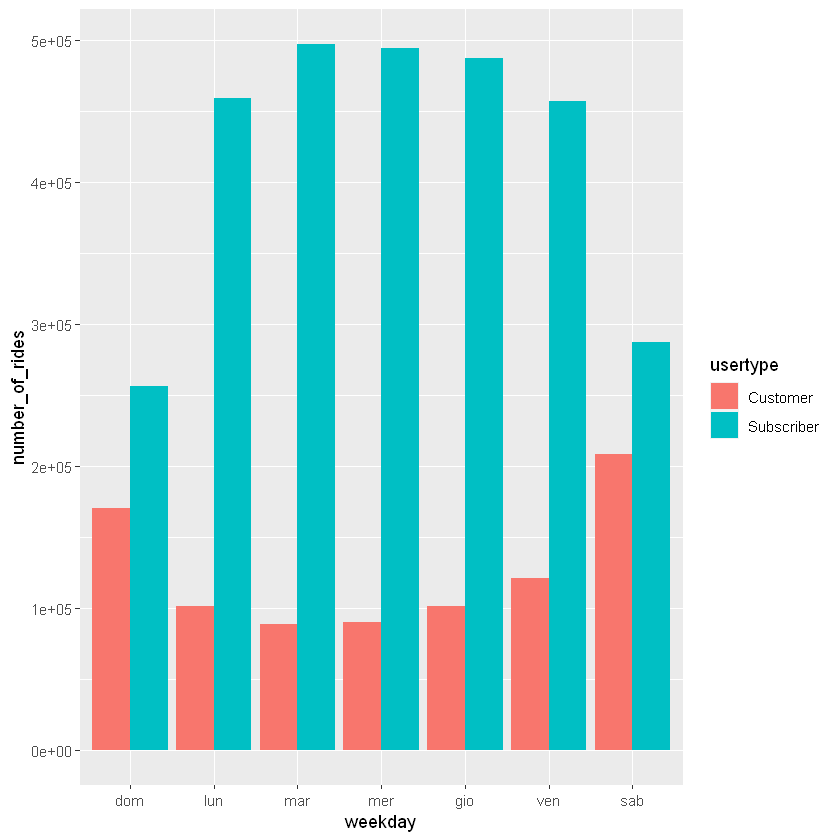

In [25]:
#install.packages("ggplot2")
library("ggplot2")
merged %>%
  mutate(weekday = wday(start_time, label = TRUE)) %>% 
  group_by(usertype, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(tripduration)) %>% 
  arrange(usertype, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = usertype)) +
  geom_col(position = "dodge")


`summarise()` has grouped output by 'usertype'. You can override using the `.groups` argument.


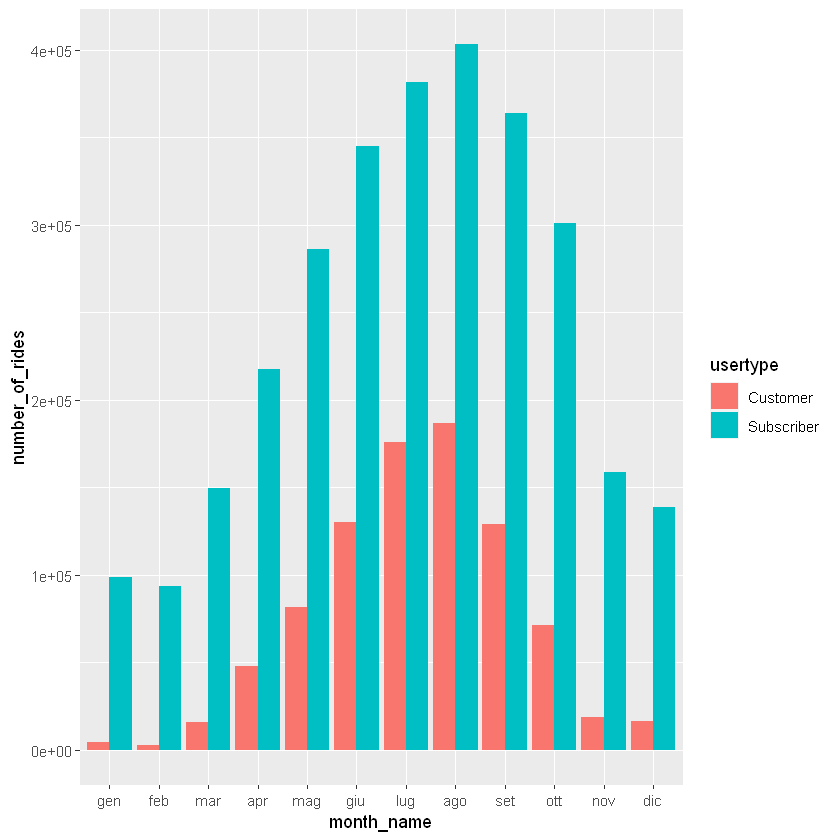

In [26]:
library("ggplot2")
merged %>%
  mutate(month_name = month(start_time, label = TRUE)) %>% 
  group_by(usertype, month_name) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(tripduration)) %>% 
  arrange(usertype, month_name)  %>% 
  ggplot(aes(x = month_name, y = number_of_rides, fill = usertype)) +
  geom_col(position = "dodge")


We know export our cleaned dataframe for further analysis.

In [27]:
file_to_save <- aggregate(merged$tripduration ~ merged$usertype + merged$day_of_week, FUN = mean)
#write.csv(file_to_save, file = 'avg_ride_length.csv')

### Share phase

We now use Tableau for making some fancy data visualizations.

Let's plot the average tripduration per user per day.

<div class='tableauPlaceholder' id='viz1638524224086' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstopne&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstopne&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstopne&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='it-IT' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638524224086');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Let's plot the average tripduration per user per month.

<div class='tableauPlaceholder' id='viz1638524149007' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstopne&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstopne&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstopne&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='it-IT' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638524149007');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Act phase

Now we tell our final conclusions:
We have seen that Customers tends to take less trips, but more usually they ride for more time.
On the other hand, Subscribers tends to take more trips but shorter.

Our goal is to convert Customers into Subscriber, so our data-driven advices are:
* To make more annual promotions during summer, where casual customers tend to take more bike trips.
* To make more promotions for users whom usually take longer trips, since usually casual customers take longer bike trips.
* To make more annual promotions at the beginning of the year, since it looks like casual customers tends to rent more bikes at the beginning of the year.